In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [73]:
df=sns.load_dataset('tips')

In [74]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [75]:
df.shape

(244, 7)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [77]:
type(df)

pandas.core.frame.DataFrame

In [78]:
df2 = df.groupby('day').size()  #sum per day
#df2.drop(['Thur'], inplace=True, axis=1) #drop thursday

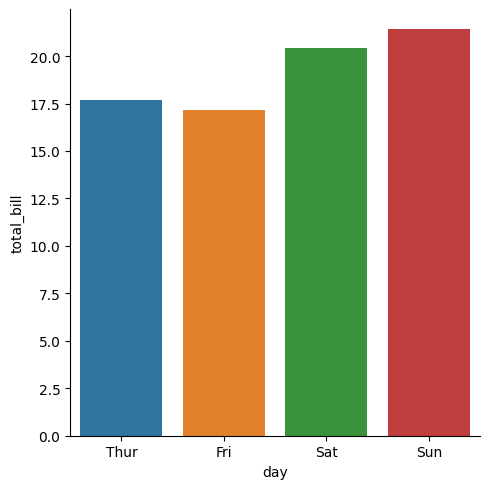

In [79]:
sns.catplot(x='day', y='total_bill', data=df, kind='bar', errorbar=None)

In [80]:
df.replace({'sex': {'Male': 0, 'Female':1}, 'smoker': {'Yes': 1, 'No':0}}, inplace=True)
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3


In [81]:
days = pd.get_dummies(df['day'])
days.sample(3)

,Thur,Fri,Sat,Sun
140,1,0,0,0
134,1,0,0,0
128,1,0,0,0


In [82]:
days = pd.get_dummies(df['day'])
df = pd.concat([df, days], axis=1)  #one hot encoding, look for label encoding
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun
0,16.99,1.01,1,0,Sun,Dinner,2,0,0,0,1
1,10.34,1.66,0,0,Sun,Dinner,3,0,0,0,1
2,21.01,3.50,0,0,Sun,Dinner,3,0,0,0,1


In [83]:
time = pd.get_dummies(df['time'])
df = pd.concat([df, time], axis=1)
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,1,0,Sun,Dinner,2,0,0,0,1,0,1
1,10.34,1.66,0,0,Sun,Dinner,3,0,0,0,1,0,1
2,21.01,3.50,0,0,Sun,Dinner,3,0,0,0,1,0,1


In [84]:
X = df[{'sex', 'smoker', 'size', 'Fri', 'Sat', 'Sun', 'Dinner'}]
y = df[{'tip'}]

/tmp/ipykernel_11911/3944642373.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[{'sex', 'smoker', 'size', 'Fri', 'Sat', 'Sun', 'Dinner'}]
/tmp/ipykernel_11911/3944642373.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y = df[{'tip'}]


In [85]:
X

,Dinner,Sun,sex,Fri,size,Sat,smoker
0,1,1,1,0,2,0,0
1,1,1,0,0,3,0,0
2,1,1,0,0,3,0,0
3,1,1,0,0,2,0,0
4,1,1,1,0,4,0,0
...,...,...,...,...,...,...,...
239,1,0,0,0,3,1,0
240,1,0,1,0,2,1,1
241,1,0,0,0,2,1,1
242,1,0,0,0,2,1,0


In [86]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)

In [89]:
X_train

,Dinner,Sun,sex,Fri,size,Sat,smoker
2,1,1,0,0,3,0,0
14,1,1,1,0,2,0,0
45,1,1,0,0,2,0,0
131,0,0,1,0,2,0,0
198,0,0,1,0,2,0,1
...,...,...,...,...,...,...,...
193,0,0,0,0,2,0,1
176,1,1,0,0,2,0,1
6,1,1,0,0,2,0,0
62,1,0,0,0,2,1,1


In [90]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [91]:
predictions = regressor.predict(X_test)

In [92]:
X_test

,Dinner,Sun,sex,Fri,size,Sat,smoker
135,0,0,1,0,2,0,0
111,1,0,1,0,1,1,0
124,0,0,1,0,2,0,0
227,1,0,0,0,4,1,0
125,0,0,1,0,6,0,0
...,...,...,...,...,...,...,...
100,1,0,1,1,2,0,1
205,0,0,1,0,3,0,1
92,1,0,1,1,2,0,1
94,1,0,1,1,2,0,0


In [93]:
predictions

array([[2.41307932],
       [2.00446276],
       [2.41307932],
       [4.11118843],
       [5.2185532 ],
       [4.43551409],
       [3.35045009],
       [2.87257137],
       [2.41569958],
       [3.40981996],
       [2.70845149],
       [2.93194124],
       [2.63918933],
       [4.05181856],
       [4.11118843],
       [2.70845149],
       [2.41569958],
       [3.35045009],
       [4.33467818],
       [2.42307646],
       [2.41569958],
       [2.41307932],
       [2.93194124],
       [3.11706805],
       [3.34782983],
       [3.63330971],
       [5.22117346],
       [2.64908162],
       [2.70845149],
       [2.70583123],
       [4.11118843],
       [3.57393984],
       [3.63330971],
       [2.92932099],
       [3.35045009],
       [2.70845149],
       [3.03277715],
       [2.22795252],
       [3.4071997 ],
       [2.92932099],
       [2.41569958],
       [4.51980499],
       [1.72170799],
       [2.87257137],
       [2.63656907],
       [2.70583123],
       [2.64908162],
       [2.646

In [94]:
y_test

,tip
135,1.25
111,1.00
124,2.52
227,3.00
125,4.20
...,...
100,2.50
205,3.23
92,1.00
94,3.25


In [95]:
regressor.coef_

array([[ 0.60970068, -0.37631864, -0.00262026, -0.21611287,  0.70136847,
        -0.31694877,  0.22348975]])

In [96]:
regressor.intercept_

array([1.01296264])

In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))

Mean Absolute Error: 0.6918601800051097
Mean Squared Error: 0.7790431554801625


In [98]:
#select total bill as a feature
X = df[{'total_bill'}]
y = df[{'tip'}]

/tmp/ipykernel_11911/884154799.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[{'total_bill'}]
/tmp/ipykernel_11911/884154799.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y = df[{'tip'}]


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predictions))

Mean Squared Error: 0.7790431554801625
